# Run YOLO V3 on Colab for images/videos
<br>


In [1]:
# We will be using a forked version of Darknet which 
# allows us to suppress the display from OpenCV, when running
# object detection on videos
!ls
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

darknet  datalab
Cloning into 'darknet'...
remote: Counting objects: 7017, done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7017 (delta 2), reused 4 (delta 2), pack-reused 7008
Receiving objects: 100% (7017/7017), 6.46 MiB | 19.46 MiB/s, done.
Resolving deltas: 100% (4656/4656), done.


In [2]:
!ls
%cd darknet
!ls
% cd ..

darknet  datalab
/content/darknet
3rdparty    data	     Makefile	      scripts
build	    image_yolov2.sh  mjpeg_stream.sh  src
cfg	    image_yolov3.sh  net_cam_v3.sh    video_v2.sh
darknet.py  LICENSE	     README.md	      video_yolov3.sh
/content


In [3]:
#Installing CUDA pre-requisites
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

--2018-05-29 09:51:50--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?NNzl1AFakGrNnMjL8eJbq2aw_QATk_A0us_Nech_cT3dxF8-eu5HB5psG4_EE0F4fJrQV9nXJ0I00-YX2_zeV7gAETnX48Ga7CfYPDkldgk1XXKYcgW3hZVAo_jxRGdGvc4MfHumcKqp6DeFv2MXpLRxqttIpZ8WugsCI3vvGzofBbrk1Nbm415gKxTLbpElurAaF8h9jgGz-a71FmmyBPGXQw [following]
--2018-05-29 09:51:50--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?NNzl1AFakGrNnMjL8eJbq2aw_QATk_A0us_Nech_cT3dxF8-eu5HB5psG4_EE0F4fJrQV9nXJ0I00-YX2_zeV7gAETnX

In [4]:
!apt update

Get:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Ign:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Hit:4 http://security.ubuntu.com/ubuntu artful-security InRelease
Get:5 file:/var/cuda-repo-8-0-local-ga2  Packages [22.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu artful InRelease
Hit:7 http://archive.ubuntu.com/ubuntu artful-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu artful-backports InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
12 packages can be upgraded. Run 'apt list --upgradable' to see them.


In [5]:
#Installing CUDA
!apt install cuda-8-0 -y

# If there is an issue installing CUDA, 
# try installing cuda-visual-tools again
# Comment the earlier command to install cuda
# Uncomment and run the below command

#!apt --fix-broken install cuda-visual-tools-8-0 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  ca-certificates-java cuda-command-line-tools-8-0 cuda-core-8-0
  cuda-cublas-8-0 cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0
  cuda-cufft-8-0 cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0
  cuda-cusolver-8-0 cuda-cusolver-dev-8-0 cuda-cusparse-8-0
  cuda-cusparse-dev-8-0 cuda-demo-suite-8-0 cuda-documentation-8-0
  cuda-driver-dev-8-0 cuda-drivers cuda-license-8-0 cuda-misc-headers-8-0
  cuda-npp-8-0 cuda-npp-dev-8-0 cuda-nvgraph-8-0 cuda-nvgraph-dev-8-0
  cuda-nvml-dev-8-0 cuda-nvrtc-8-0 cuda-nvrtc-dev-8-0 cuda-runtime-8-0
  cuda-samples-8-0 cuda-toolkit-8-0 cuda-visual-tools-8-0 default-jre
  default-jre-headless fonts-dejavu-extra freeglut3 freeglut3-dev java-common
  libatk-wrapper-java libatk-wrapper-java-jni libcuda1-375 libdrm-dev
  libgl1-mesa-dev libglu1-mesa libglu1-mesa-dev libice-dev libsm-dev
  libx11-xc

Get:73 file:/var/cuda-repo-8-0-local-ga2  cuda-documentation-8-0 8.0.61-1 [113 MB]m
Get:74 file:/var/cuda-repo-8-0-local-ga2  cuda-nvml-dev-8-0 8.0.61-1 [48.4 kB]
Get:75 file:/var/cuda-repo-8-0-local-ga2  cuda-nvgraph-8-0 8.0.61-1 [2,948 kB]
Get:76 file:/var/cuda-repo-8-0-local-ga2  cuda-nvgraph-dev-8-0 8.0.61-1 [3,028 kB]
Get:77 file:/var/cuda-repo-8-0-local-ga2  cuda-visual-tools-8-0 8.0.61-1 [286 MB]
Get:78 file:/var/cuda-repo-8-0-local-ga2  cuda-toolkit-8-0 8.0.61-1 [2,892 B]
Get:79 file:/var/cuda-repo-8-0-local-ga2  cuda-drivers 375.26-1 [2,400 B]
Get:80 file:/var/cuda-repo-8-0-local-ga2  cuda-runtime-8-0 8.0.61-1 [2,574 B]
Get:81 file:/var/cuda-repo-8-0-local-ga2  cuda-demo-suite-8-0 8.0.61-1 [4,988 kB]
Get:82 file:/var/cuda-repo-8-0-local-ga2  cuda-8-0 8.0.61-1 [2,556 B]
Fetched 32.1 MB in 21s (1,483 kB/s)
Extracting templates from packages: 100%

78Selecting previously unselected package java-common.
(Reading database ... 78976 files and directories currently installed.)
Prep

7Progress: [ 26%] [###############...........................................] 8Selecting previously unselected package libgl1-mesa-dev:amd64.
Preparing to unpack .../36-libgl1-mesa-dev_17.2.8-0ubuntu0~17.10.1_amd64.deb ...
Unpacking libgl1-mesa-dev:amd64 (17.2.8-0ubuntu0~17.10.1) ...
7Progress: [ 27%] [###############...........................................] 8Selecting previously unselected package libglu1-mesa:amd64.
Preparing to unpack .../37-libglu1-mesa_9.0.0-2.1build1_amd64.deb ...
Unpacking libglu1-mesa:amd64 (9.0.0-2.1build1) ...
Selecting previously unselected package libglu1-mesa-dev:amd64.
Preparing to unpack .../38-libglu1-mesa-dev_9.0.0-2.1build1_amd64.deb ...
Unpacking libglu1-mesa-dev:amd64 (9.0.0-2.1build1) ...
7Progress: [ 28%] [################..........................................] 8Selecting previously unselected package libice-dev:amd64.
Preparing to unpack .../39-libice-dev_2%3a1.0.9-2_amd64.deb ...
Unpacking libice-dev:amd64 (2:1.0.9-2) ...
7Progres

Selecting previously unselected package cuda-runtime-8-0.
Preparing to unpack .../78-cuda-runtime-8-0_8.0.61-1_amd64.deb ...
7Progress: [ 57%] [#################################.........................] 8Unpacking cuda-runtime-8-0 (8.0.61-1) ...
Selecting previously unselected package cuda-demo-suite-8-0.
Preparing to unpack .../79-cuda-demo-suite-8-0_8.0.61-1_amd64.deb ...
Unpacking cuda-demo-suite-8-0 (8.0.61-1) ...
7Progress: [ 58%] [#################################.........................] 8Selecting previously unselected package cuda-8-0.
Preparing to unpack .../80-cuda-8-0_8.0.61-1_amd64.deb ...
Unpacking cuda-8-0 (8.0.61-1) ...
7Progress: [ 59%] [##################################........................] 8Selecting previously unselected package fonts-dejavu-extra.
Preparing to unpack .../81-fonts-dejavu-extra_2.37-1_all.deb ...
Unpacking fonts-dejavu-extra (2.37-1) ...
Setting up nvidia-375 (384.111-0ubuntu0.17.10.1) ...
7Progress: [ 60%] [############################

Adding debian:Certum_Trusted_Network_CA_2.pem
Adding debian:Camerfirma_Global_Chambersign_Root.pem
Adding debian:UTN_USERFirst_Hardware_Root_CA.pem
Adding debian:Amazon_Root_CA_3.pem
Adding debian:AffirmTrust_Commercial.pem
Adding debian:Cybertrust_Global_Root.pem
Adding debian:USERTrust_RSA_Certification_Authority.pem
Adding debian:AddTrust_Qualified_Certificates_Root.pem
Adding debian:GeoTrust_Universal_CA.pem
Adding debian:QuoVadis_Root_CA_2.pem
Adding debian:OpenTrust_Root_CA_G3.pem
Adding debian:Swisscom_Root_CA_1.pem
Adding debian:Comodo_Trusted_Services_root.pem
Adding debian:Baltimore_CyberTrust_Root.pem
Adding debian:T-TeleSec_GlobalRoot_Class_3.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_RootCA_2011.pem
Adding debian:Verisign_Class_3_Public_Primary_Certification_Authority_-_G3.pem
Adding debian:AddTrust_Public_Services_Root.pem
Adding debian:COMODO_RSA_Certification_Authority.pem
Adding debian:IdenTrust_Public_Sector_Root_CA_1.pem
Adding debian:Hellenic_Acad

In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [8]:
#Installing compilers
!apt install gcc-5 g++-5 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libmpx0 libstdc++-5-dev
0 upgraded, 8 newly installed, 0 to remove and 12 not upgraded.
Need to get 28.6 MB of archives.
After this operation, 98.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 gcc-5-base amd64 5.5.0-1ubuntu2 [17.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 cpp-5 amd64 5.5.0-1ubuntu2 [7,798 kB]
Get:3 http://archive.u

In [0]:
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [11]:
#Changing the variables to include OpenCV and GPU in the Makefile
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
#!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

/content/darknet


In [12]:
# And this is how our Makefile looks now
# Check if OPENCV = 1 and GPU = 1
!cat Makefile

GPU=1
CUDNN=0
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision using Tensor Cores) on GPU Tesla V100, Titan V, DGX-2
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)

DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	  -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# GTX 1080, GTX 1070, GTX 1060, GTX 1050, GTX 1030, Titan Xp, Tesla P40, Tesla P4
# ARCH= -gencode arch=compute_61,code=sm_61 -gencode arch=compute_61,code=compute_61

# GP100/Tesla P100 � DGX-1
# ARCH= -gencode arch=compute_60,code=sm_60

# For Jetson Tx1 uncomment:
# ARCH= -gencode arch=compute_51,code=[sm_51,compute_51]

# For Jetson Tx2 or

In [13]:
# Apparently we need to install this so that OpenCV can work without any issues
# when we are making the file
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.1.0+dfsg1-1~exp1ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [14]:
#Running make!
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
g++  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool MJPGWriter::write(const cv::Mat&)’:
./src/http_stream.cpp:184:11: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
     if (n < outlen)
         ~~^~~~~~~~
gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘gemm_ongpu’:
./src/gemm.c:308:14: warning: unused variable ‘stream_status’ [-Wunused-variable]
  cudaError_t stream_status = cublasSetStream(handle, get_cuda_stream());
              ^~~~~~~~~~~~~
gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-err

gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/shortcut_layer.c -o obj/shortcut_layer.o
gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/activation_layer.c -o obj/activation_layer.o
gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/rnn_layer.c -o obj/rnn_layer.o
gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/gru_layer.c -o obj/gru_layer.o
gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/rnn.c -

In [15]:
# Downloading YOLO weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2018-05-29 10:01:19--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  40.5MB/s    in 10s     

2018-05-29 10:01:30 (23.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [16]:
# Let's see if it can detect object without any issues.
# Here is an example from YOLO
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [17]:
!ls

3rdparty  darknet.py	   Makefile	    README.md	 video_yolov3.sh
backup	  data		   mjpeg_stream.sh  results	 yolov3.weights
build	  image_yolov2.sh  net_cam_v3.sh    scripts
cfg	  image_yolov3.sh  obj		    src
darknet   LICENSE	   predictions.jpg  video_v2.sh


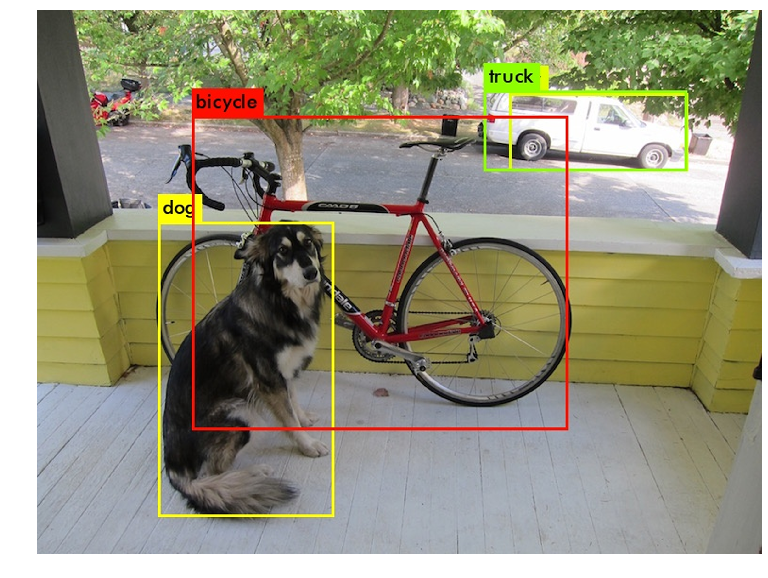

In [18]:
#The DOG, The TRUCK and The Bicycle!
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("predictions.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()




In [23]:
# Upload the video you want to use for object detection
# Please use a filename without spaces like test.mp4 etc.
%cd 
%cd darknet
!ls
%cd data
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)


/content
/content/darknet
3rdparty  darknet.py	   Makefile	    README.md	 video_yolov3.sh
backup	  data		   mjpeg_stream.sh  results	 yolov3.weights
build	  image_yolov2.sh  net_cam_v3.sh    scripts
cfg	  image_yolov3.sh  obj		    src
darknet   LICENSE	   predictions.jpg  video_v2.sh
/content/darknet/data


Saving cut.mp4 to cut.mp4
saved file cut.mp4


In [36]:
# And finally run it! Please check if you have given the right video file name
%cd 
%cd darknet
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show data/cut.mp4 -i 0 -out_filename res.avi
 

/content
/content/darknet
Demo
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->   


FPS:15.2
Objects:

sports ball: 100% 
person: 100% 
person: 100% 
person: 100% 
person: 99% 
person: 29% 

 cvWriteFrame 

 cvWriteFrame 

FPS:13.3
Objects:

sports ball: 97% 
person: 100% 
person: 100% 
person: 99% 
person: 83% 
person: 26% 

 cvWriteFrame 

FPS:15.0
Objects:

sports ball: 100% 
person: 100% 
person: 100% 
person: 92% 
person: 88% 

 cvWriteFrame 

FPS:14.0
Objects:

sports ball: 99% 
person: 100% 
person: 100% 
person: 98% 
person: 86% 
person: 46% 

 cvWriteFrame 

FPS:14.9
Objects:

sports ball: 100% 
person: 100% 
person: 100% 
person: 94% 
person: 73% 
person: 42% 

 cvWriteFrame 

FPS:14.6
Objects:

sports ball: 100% 
person: 100% 
person: 99% 
person: 98% 
person: 67% 

 cvWriteFrame 

FPS:14.8
Objects:

sports ball: 100% 
person: 100% 
person: 99% 
person: 98% 
person: 67% 

 cvWriteFrame 

FPS:15.1
Objects:

sports ball: 100% 
person: 100% 
person: 99% 
person: 92% 

 cvWriteFrame 

FPS:15.3
Objects:

sports ball: 100% 
person: 99% 
person: 99% 
person: 91% 


 cvWriteFrame 

FPS:14.5
Objects:

sports ball: 100% 
person: 100% 
person: 100% 
person: 99% 
person: 98% 
person: 38% 

 cvWriteFrame 

FPS:14.7
Objects:

sports ball: 100% 
person: 100% 
person: 100% 
person: 99% 
person: 98% 
person: 37% 

 cvWriteFrame 

FPS:12.6
Objects:

sports ball: 99% 
person: 100% 
person: 100% 
person: 97% 
person: 95% 
person: 85% 

 cvWriteFrame 

FPS:13.6
Objects:

sports ball: 100% 
person: 100% 
person: 100% 
person: 96% 
person: 94% 
person: 43% 

 cvWriteFrame 

FPS:13.8
Objects:

sports ball: 100% 
person: 100% 
person: 100% 
person: 99% 
person: 89% 

 cvWriteFrame 

FPS:13.0
Objects:

sports ball: 100% 
person: 100% 
person: 99% 
person: 94% 
person: 79% 
person: 47% 
person: 42% 
person: 37% 

 cvWriteFrame 

FPS:14.1
Objects:

sports ball: 100% 
person: 99% 
person: 98% 
person: 93% 
person: 90% 

 cvWriteFrame 

FPS:15.0
Objects:

sports ball: 100% 
person: 99% 
person: 98% 
person: 92% 
person: 91% 
person: 26% 

 cvWriteFrame 

FPS:14.7
Obje


 cvWriteFrame 

FPS:13.4
Objects:

person: 100% 
person: 99% 
person: 99% 
person: 97% 
person: 86% 
person: 53% 
person: 47% 
person: 42% 
person: 36% 
person: 34% 

 cvWriteFrame 

FPS:14.0
Objects:

person: 100% 
person: 99% 
person: 99% 
person: 97% 
person: 86% 
person: 53% 
person: 48% 
person: 41% 
person: 36% 
person: 33% 

 cvWriteFrame 

FPS:11.4
Objects:

sports ball: 80% 
person: 100% 
person: 100% 
person: 99% 
person: 83% 
person: 82% 
person: 81% 
person: 72% 
person: 37% 
person: 33% 
person: 31% 
person: 28% 

FPS:13.1
Objects:

sports ball: 39% 
person: 100% 
person: 100% 
person: 99% 
person: 93% 
person: 86% 

 cvWriteFrame 
person: 81% 
person: 69% 
person: 44% 
person: 31% 
person: 28% 

 cvWriteFrame 

FPS:13.1
Objects:

sports ball: 54% 
person: 100% 
person: 99% 
person: 99% 
person: 91% 
person: 83% 
person: 66% 
person: 64% 
person: 61% 
person: 60% 
person: 51% 
person: 32% 
person: 32% 
person: 29% 

 cvWriteFrame 

FPS:13.4
Objects:

sports ball: 50% 
per


 cvWriteFrame 

FPS:13.6
Objects:

sports ball: 81% 
person: 100% 
person: 100% 
person: 54% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 100% 
person: 100% 
person: 47% 

 cvWriteFrame 

FPS:11.7
Objects:

person: 100% 
person: 99% 
person: 43% 
person: 35% 

 cvWriteFrame 

FPS:13.0
Objects:

person: 100% 
person: 100% 
person: 40% 

 cvWriteFrame 

FPS:13.9
Objects:

person: 100% 
person: 100% 

FPS:14.8
Objects:

person: 100% 
person: 100% 

 cvWriteFrame 

FPS:13.6
Objects:

person: 100% 
person: 100% 

 cvWriteFrame 

 cvWriteFrame 

FPS:14.5
Objects:

person: 100% 
person: 100% 

 cvWriteFrame 

FPS:13.4
Objects:

person: 100% 
person: 99% 
person: 37% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 100% 
person: 99% 

 cvWriteFrame 

FPS:11.7
Objects:

person: 100% 
person: 98% 
person: 36% 
person: 27% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 100% 
person: 98% 
person: 34% 
person: 27% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 100% 
person: 97% 
person: 29% 

 cvWriteFram

In [38]:
# Download the resulting video and use VLC to run it
!ls -all
files.download('res.avi')


total 273648
drwxr-xr-x 13 root root      4096 May 29 10:17 .
drwxr-xr-x  1 root root      4096 May 29 10:01 ..
drwxr-xr-x  5 root root      4096 May 29 09:51 3rdparty
drwxr-xr-x  2 root root      4096 May 29 09:59 backup
drwxr-xr-x  3 root root      4096 May 29 09:51 build
drwxr-xr-x  3 root root      4096 May 29 09:51 cfg
drwxr-xr-x  2 root root      4096 May 29 09:51 .circleci
-rwxr-xr-x  1 root root   2123672 May 29 10:00 darknet
-rw-r--r--  1 root root     15417 May 29 09:51 darknet.py
drwxr-xr-x  3 root root      4096 May 29 10:06 data
drwxr-xr-x  8 root root      4096 May 29 09:51 .git
-rw-r--r--  1 root root       233 May 29 09:51 .gitignore
-rw-r--r--  1 root root       108 May 29 09:51 image_yolov2.sh
-rw-r--r--  1 root root       110 May 29 09:51 image_yolov3.sh
-rw-r--r--  1 root root       515 May 29 09:51 LICENSE
-rw-r--r--  1 root root      4247 May 29 09:59 Makefile
-rw-r--r--  1 root root       245 May 29 09:51 mjpeg_stream.sh
-rw-r--r--  1 root root       160 May 29 0

# Here is a sample output:
https://www.youtube.com/watch?v=u0gxK6k1agM&feature=youtu.be



